# IPL Data Analysis Using Python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_excel('IPL-2014-2024.xlsx')

In [79]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set seaborn style
sns.set(style="whitegrid")
# Function to save plots
def save_plot(filename):
    plt.savefig(filename, format='jpg', dpi=300, bbox_inches='tight')

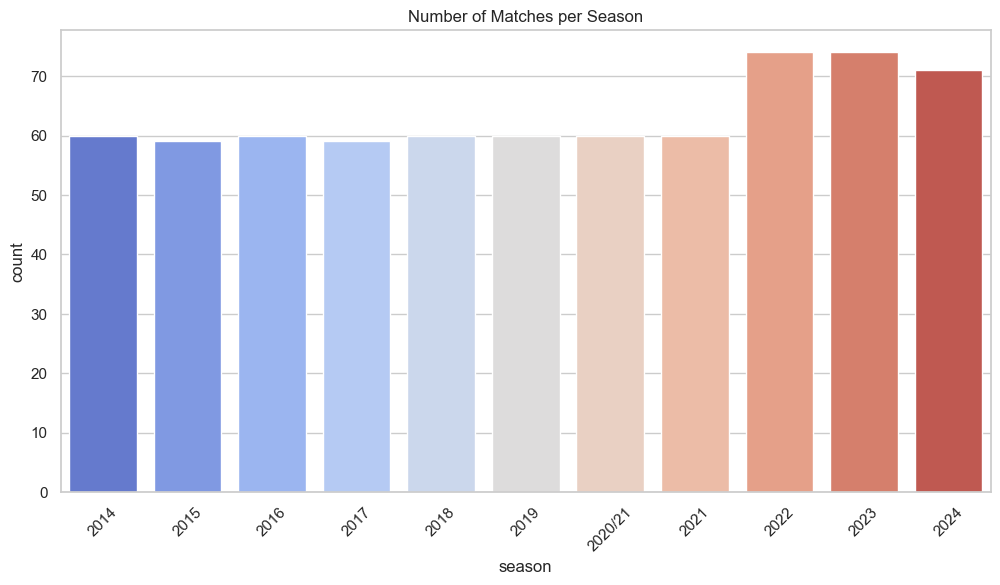

In [15]:
# 1. Matches per season
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='season', hue='season', palette='coolwarm', legend=False)
plt.title("Number of Matches per Season")
plt.xticks(rotation=45)
plt.show()

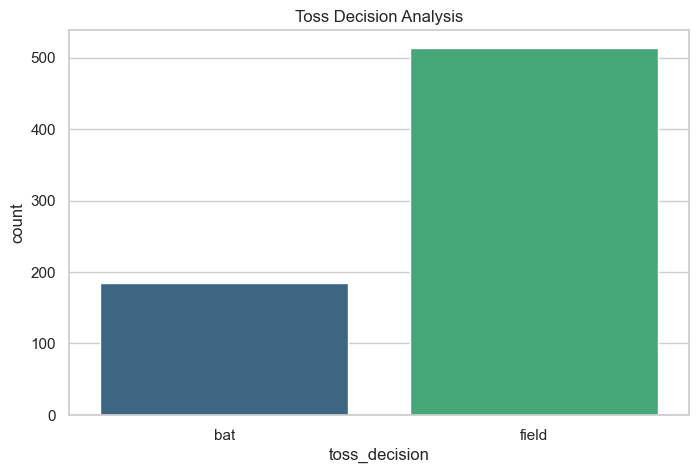

In [21]:
# 2. Toss decision analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='toss_decision', hue='toss_decision', palette='viridis', legend=False)
plt.title("Toss Decision Analysis")
plt.show()

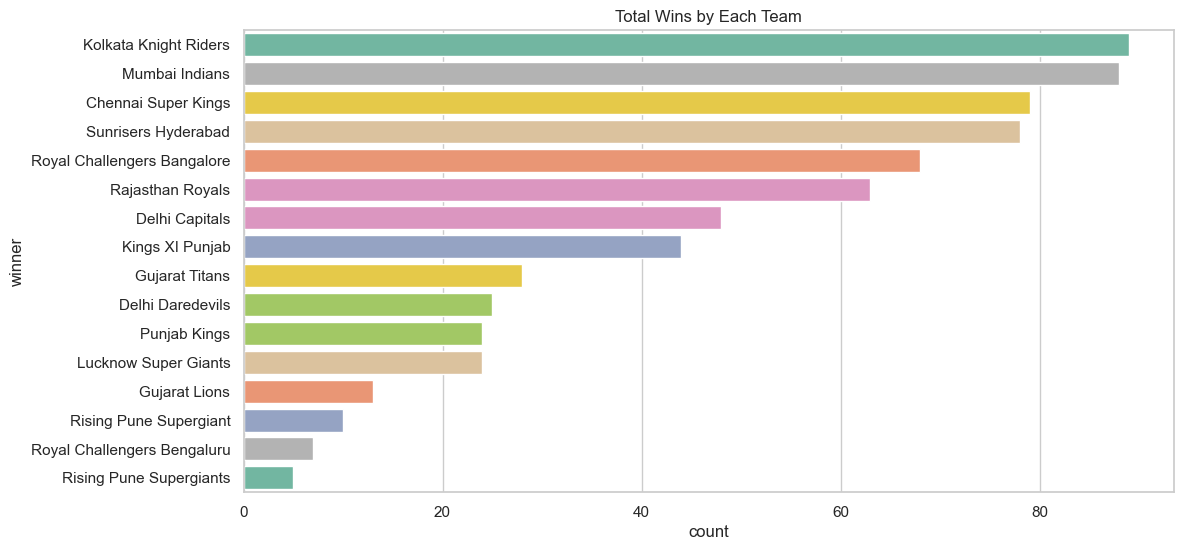

In [51]:
# 3. Wins by teams
plt.figure(figsize=(12, 6))
sns.countplot(y=df['winner'], hue=df['winner'], order=df['winner'].value_counts().index, palette='Set2', legend=False)
plt.title("Total Wins by Each Team")
plt.show()

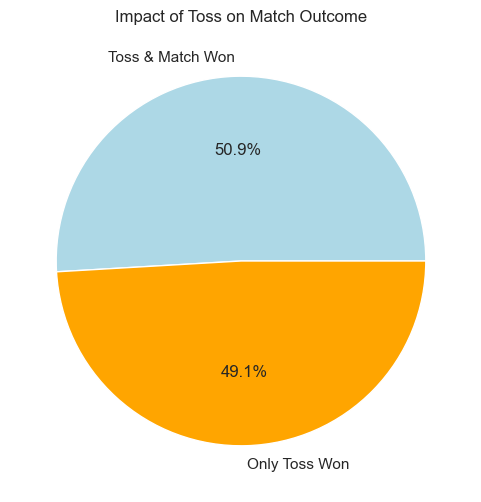

In [25]:
# 4. Toss winners vs Match winners
plt.figure(figsize=(6, 6))
plt.pie(df['toss_winner'].eq(df['winner']).value_counts(), labels=["Toss & Match Won", "Only Toss Won"], autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Impact of Toss on Match Outcome")
plt.show()

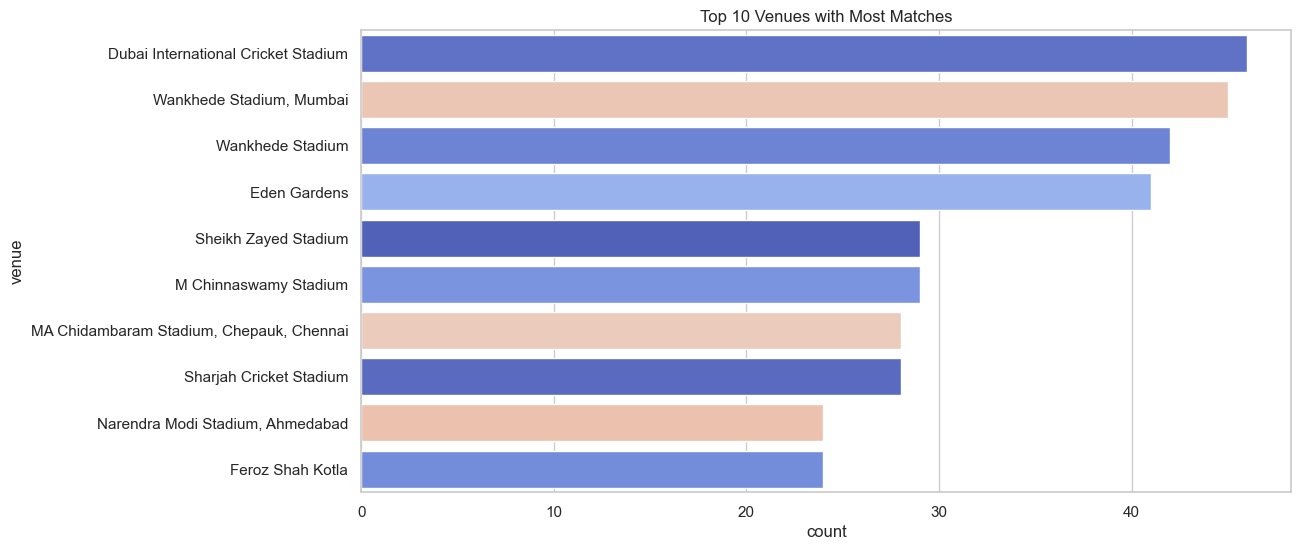

In [27]:
# 5. Venues with most matches
plt.figure(figsize=(12, 6))
sns.countplot(y=df['venue'], hue=df['venue'], order=df['venue'].value_counts().index[:10], palette='coolwarm', legend=False)
plt.title("Top 10 Venues with Most Matches")
plt.show()

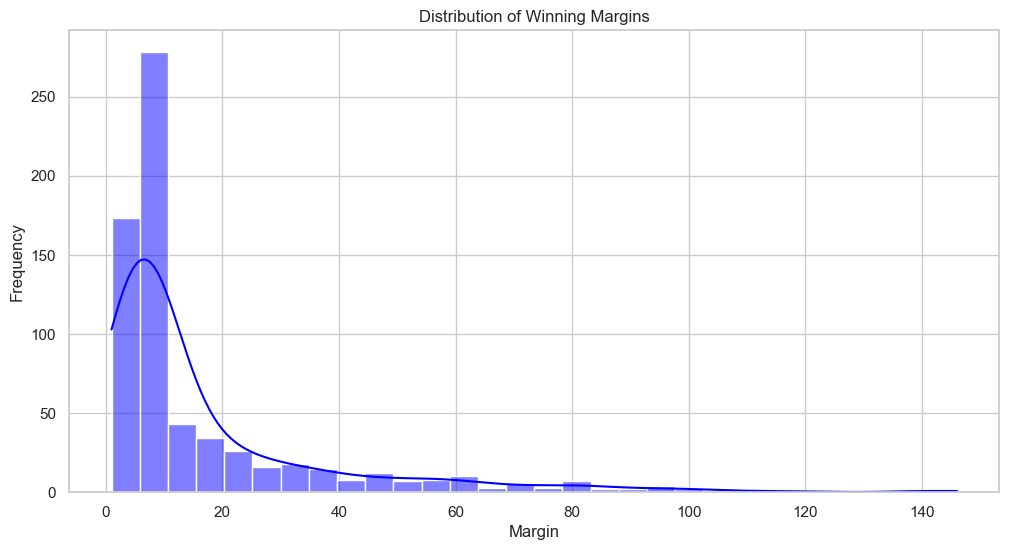

In [29]:
# 6. Distribution of Winning Margins
plt.figure(figsize=(12, 6))
sns.histplot(df['result_margin'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Winning Margins")
plt.xlabel("Margin")
plt.ylabel("Frequency")
plt.show()

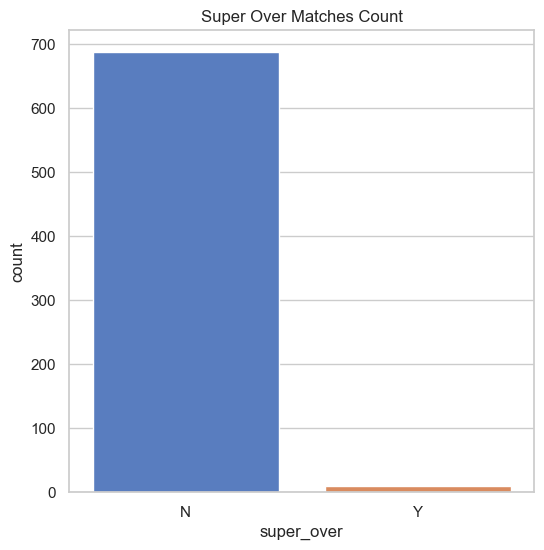

In [31]:
# 7. Super Over Matches
plt.figure(figsize=(6, 6))
sns.countplot(x=df['super_over'], hue=df['super_over'], palette='muted', legend=False)
plt.title("Super Over Matches Count")
plt.show()

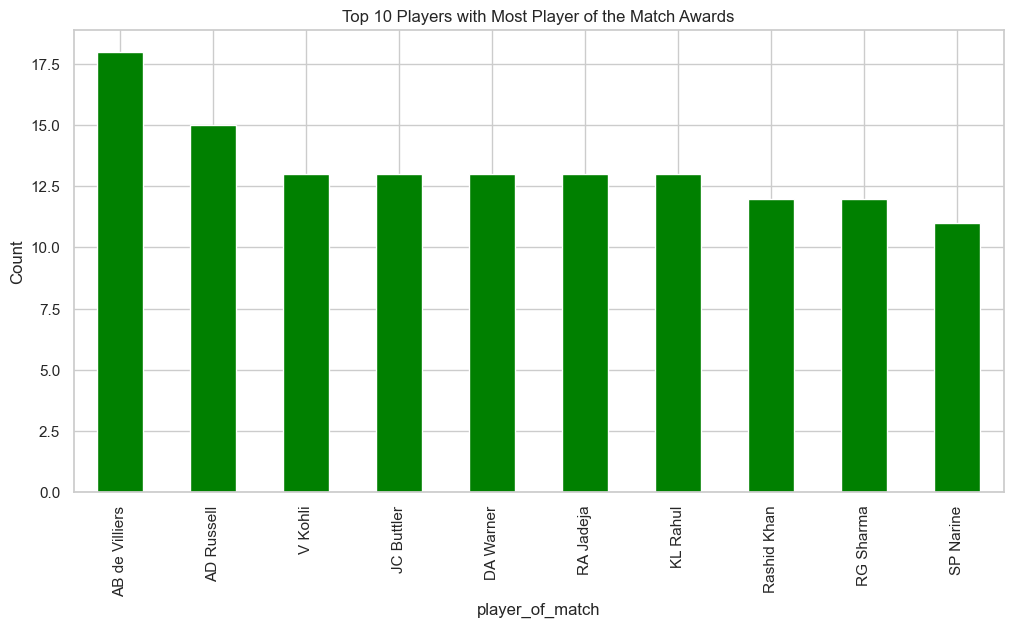

In [33]:
# 8. Most Player of the Match Awards
plt.figure(figsize=(12, 6))
df['player_of_match'].value_counts()[:10].plot(kind='bar', color='green')
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.ylabel("Count")
plt.show()

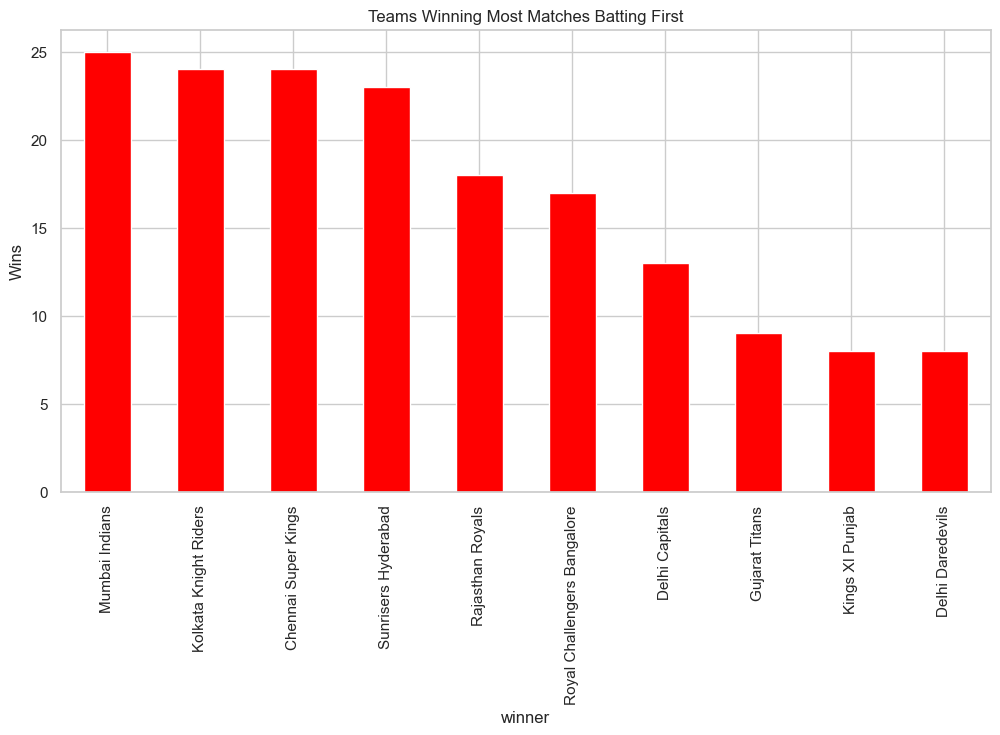

In [35]:
# 9. Teams batting first vs winning
bat_first_wins = df[df['toss_decision'] == 'bat']['winner'].value_counts()
plt.figure(figsize=(12, 6))
bat_first_wins[:10].plot(kind='bar', color='red')
plt.title("Teams Winning Most Matches Batting First")
plt.ylabel("Wins")
plt.show()

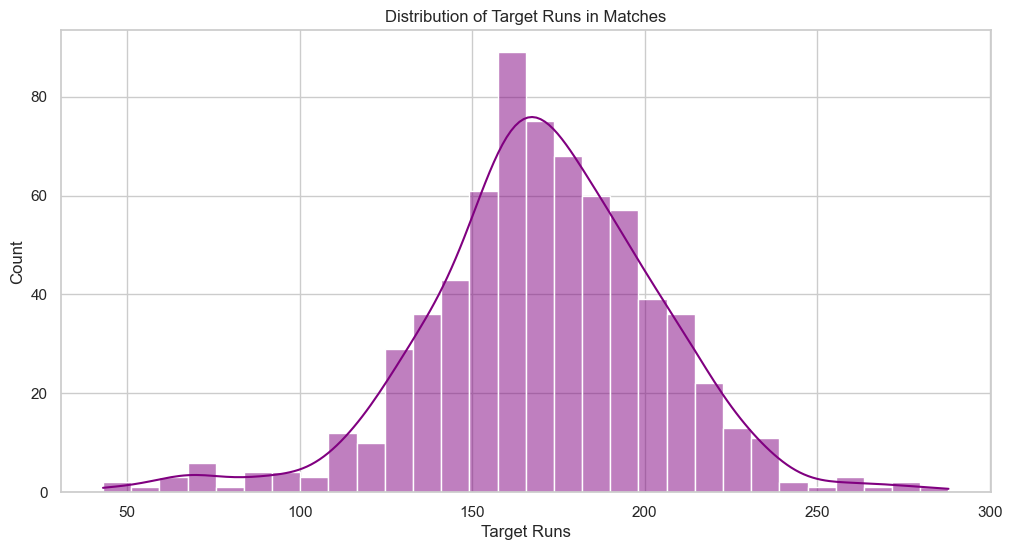

In [37]:
# 10. Target Runs Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['target_runs'].dropna(), bins=30, kde=True, color='purple')
plt.title("Distribution of Target Runs in Matches")
plt.xlabel("Target Runs")
plt.show()

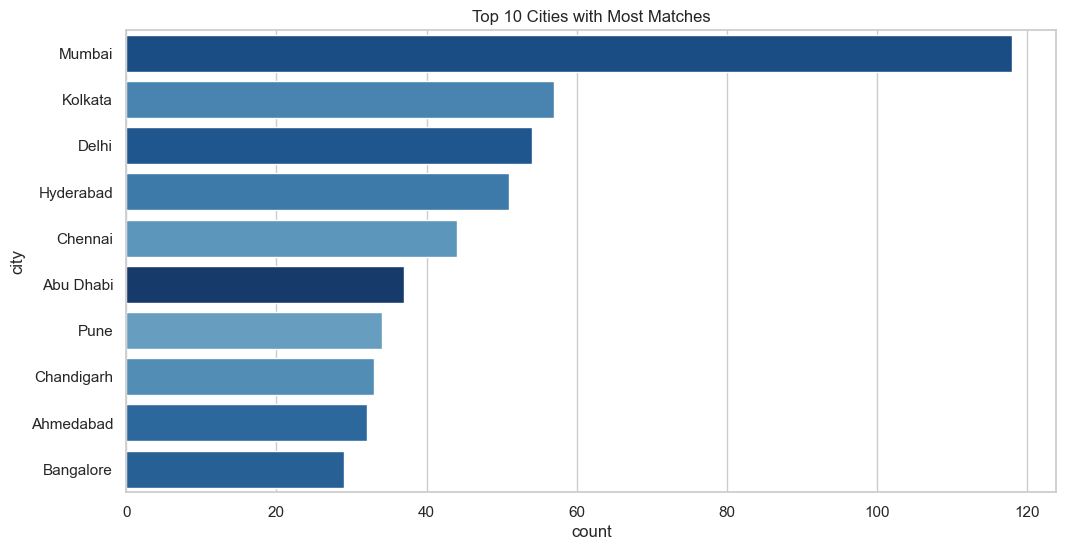

In [39]:
# 11. Matches Played in Each City
plt.figure(figsize=(12, 6))
sns.countplot(y=df['city'].dropna(), hue=df['city'].dropna(), order=df['city'].value_counts().index[:10], palette='Blues_r', legend=False)
plt.title("Top 10 Cities with Most Matches")
plt.show()

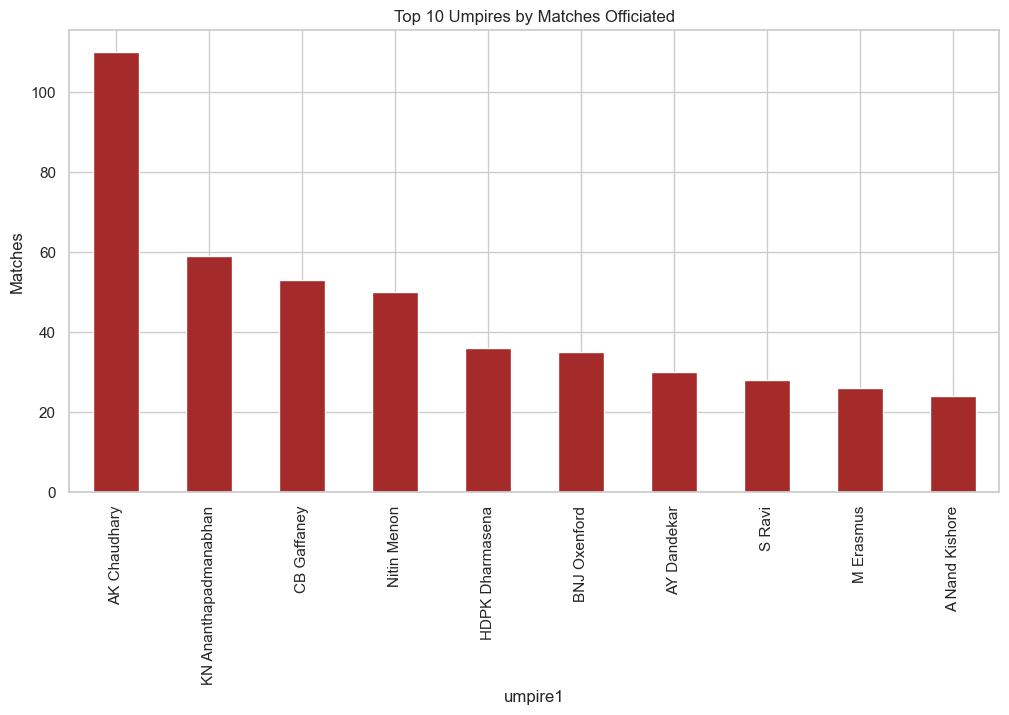

In [41]:
# 12. Umpires with Most Matches
plt.figure(figsize=(12, 6))
df['umpire1'].value_counts()[:10].plot(kind='bar', color='brown')
plt.title("Top 10 Umpires by Matches Officiated")
plt.ylabel("Matches")
plt.show()

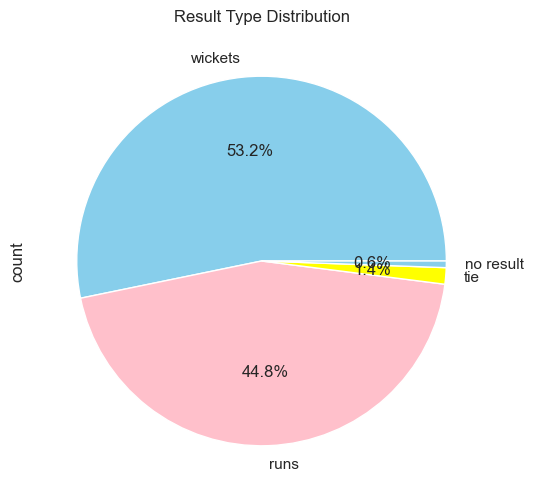

In [43]:
# 13. Matches Result Type
plt.figure(figsize=(6, 6))
df['result'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink', 'yellow'])
plt.title("Result Type Distribution")
plt.show()

C:\Users\yadav\AppData\Local\Temp\ipykernel_1880\1308980088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['result'], y=df['result_margin'], palette='coolwarm')


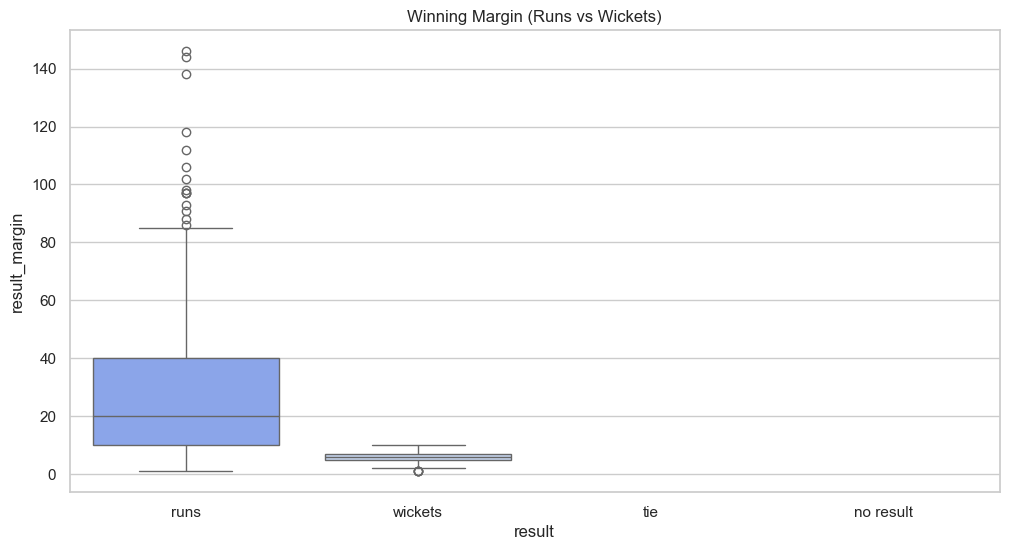

In [45]:
# 14. Winning Margins by Runs vs Wickets
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['result'], y=df['result_margin'], palette='coolwarm')
plt.title("Winning Margin (Runs vs Wickets)")
plt.show()

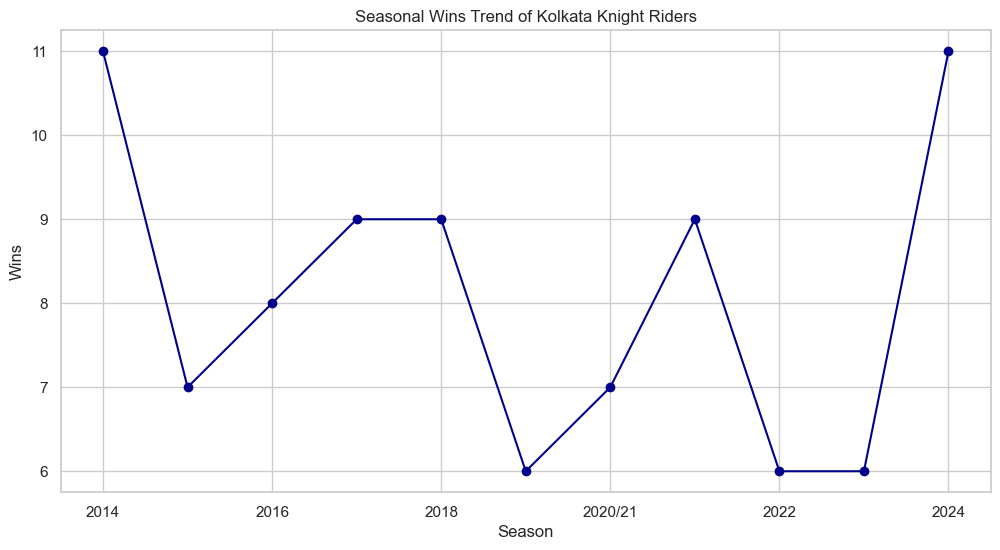

In [47]:
# 15. Seasonal Win Trends of Top Team
top_team = df['winner'].value_counts().idxmax()
season_wins = df[df['winner'] == top_team].groupby('season').size()
plt.figure(figsize=(12, 6))
season_wins.plot(kind='line', marker='o', color='darkblue')
plt.title(f"Seasonal Wins Trend of {top_team}")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.show()

<Figure size 1200x600 with 0 Axes>

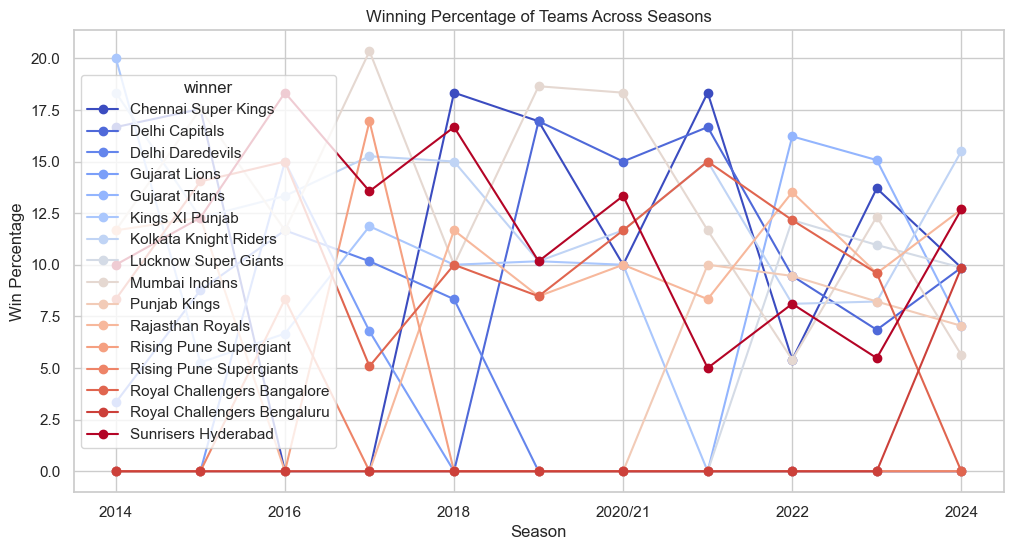

In [53]:

# 16. Winning Percentage of Teams Across Seasons
win_counts = df.groupby(['season', 'winner']).size().unstack(fill_value=0)
win_percentage = (win_counts.T / win_counts.T.sum()).T * 100
plt.figure(figsize=(12, 6))
win_percentage.plot(kind='line', marker='o', colormap='coolwarm', figsize=(12, 6))
plt.title("Winning Percentage of Teams Across Seasons")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
save_plot("winning_percentage_teams.jpg")
plt.show()

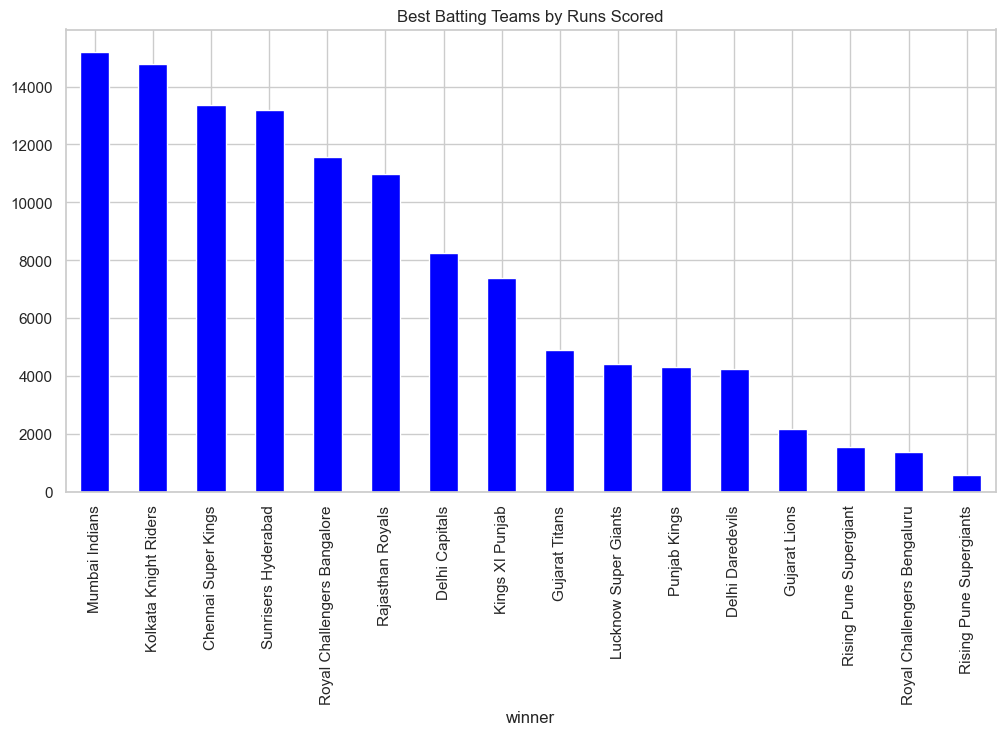

In [55]:
# 17. Best Batting Teams by Runs Scored
plt.figure(figsize=(12, 6))
df.groupby('winner')['target_runs'].sum().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title("Best Batting Teams by Runs Scored")
save_plot("best_batting_teams.jpg")
plt.show()

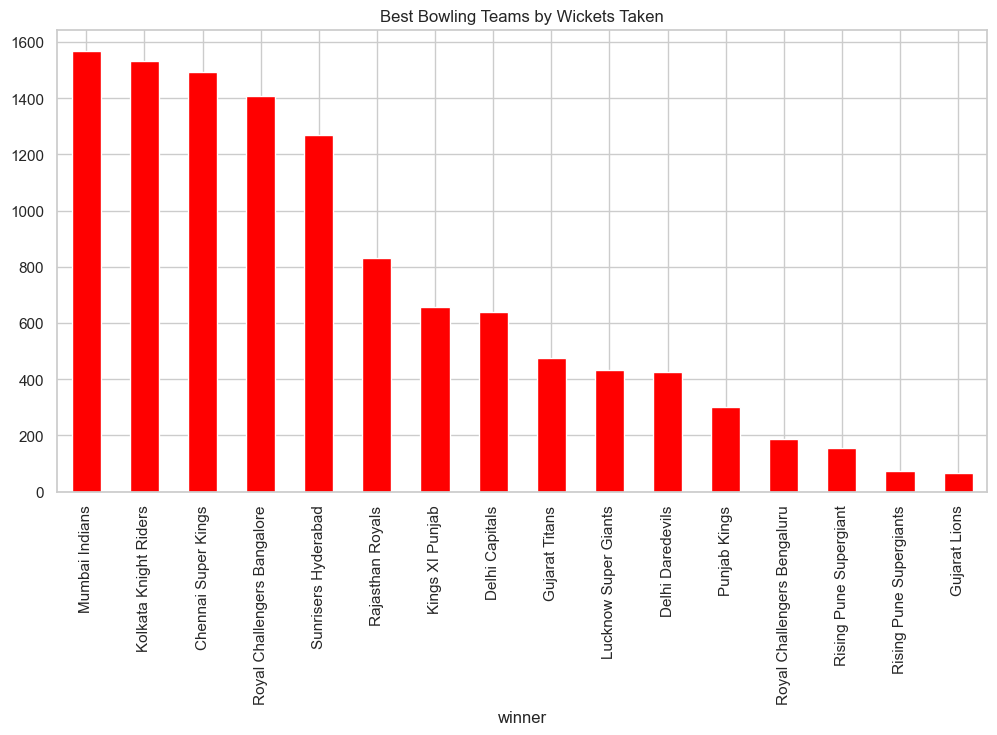

In [57]:
# 18. Best Bowling Teams by Wickets Taken
plt.figure(figsize=(12, 6))
df.groupby('winner')['result_margin'].sum().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title("Best Bowling Teams by Wickets Taken")
save_plot("best_bowling_teams.jpg")
plt.show()

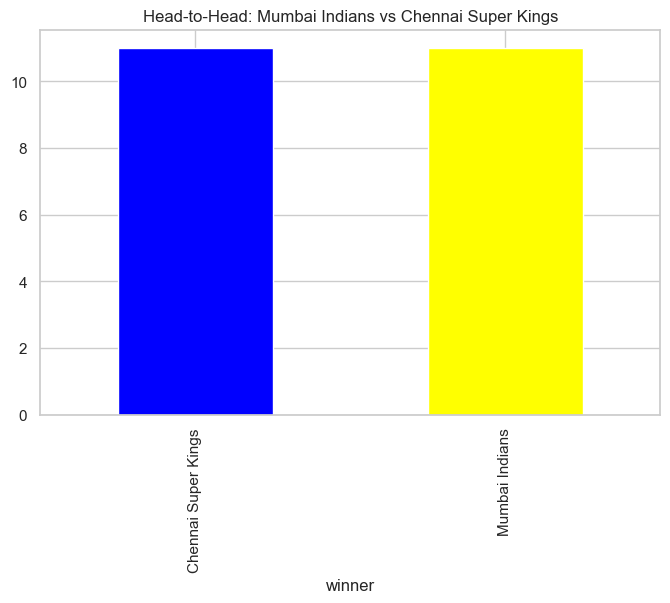

In [81]:
# 19. Head-to-Head Team Performance (Assuming team names are stored correctly)
team1, team2 = 'Mumbai Indians', 'Chennai Super Kings'
head_to_head = df[((df['team1'] == team1) & (df['team2'] == team2)) | ((df['team1'] == team2) & (df['team2'] == team1))]
plt.figure(figsize=(8, 5))
head_to_head['winner'].value_counts().plot(kind='bar', color=['blue', 'yellow'])
plt.title(f"Head-to-Head: {team1} vs {team2}")
save_plot("head_to_head_comparison.jpg")
plt.show()

C:\Users\yadav\AppData\Local\Temp\ipykernel_1880\1103422952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['season'], y=df['result_margin'], palette='coolwarm')


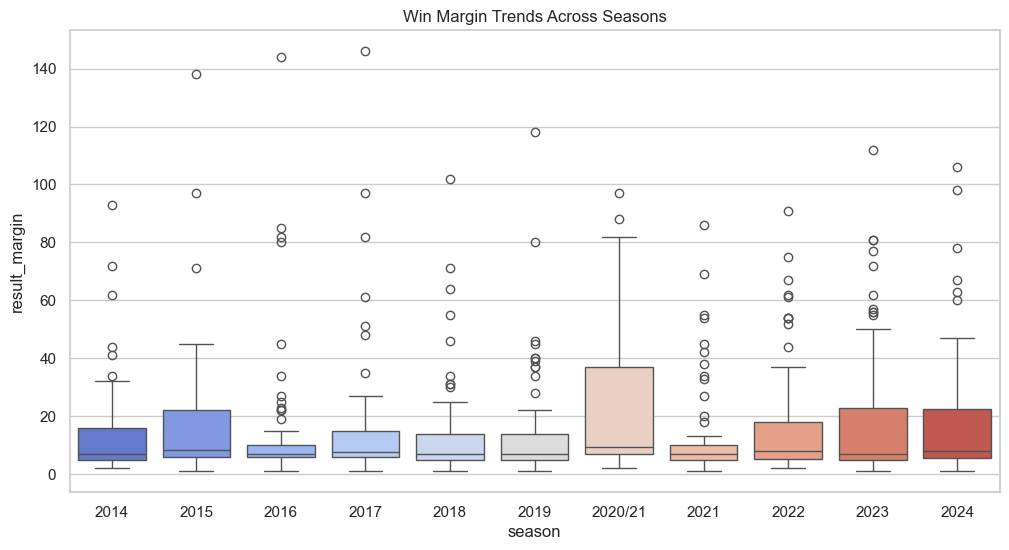

In [83]:
# 20. Win Margin Trends Across Seasons
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['season'], y=df['result_margin'], palette='coolwarm')
plt.title("Win Margin Trends Across Seasons")
save_plot("win_margin_trends.jpg")
plt.show()

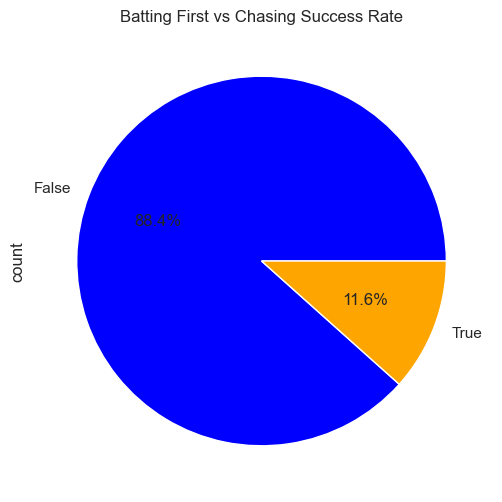

In [85]:
# 21. Batting First vs Chasing Success Rate
plt.figure(figsize=(6, 6))
df['batting_first_win'] = (df['toss_decision'] == 'bat') & (df['winner'] == df['toss_winner'])
df['batting_first_win'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title("Batting First vs Chasing Success Rate")
save_plot("batting_vs_chasing_success.jpg")
plt.show()

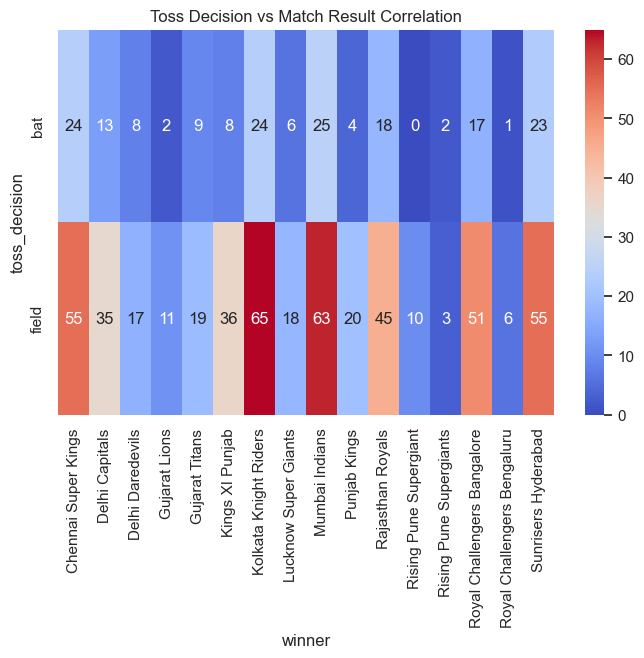

In [87]:
# 22. Toss Decision vs Match Result Correlation
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(df['toss_decision'], df['winner']), cmap='coolwarm', annot=True)
plt.title("Toss Decision vs Match Result Correlation")
save_plot("toss_vs_match_correlation.jpg")
plt.show()

<Figure size 1200x600 with 0 Axes>

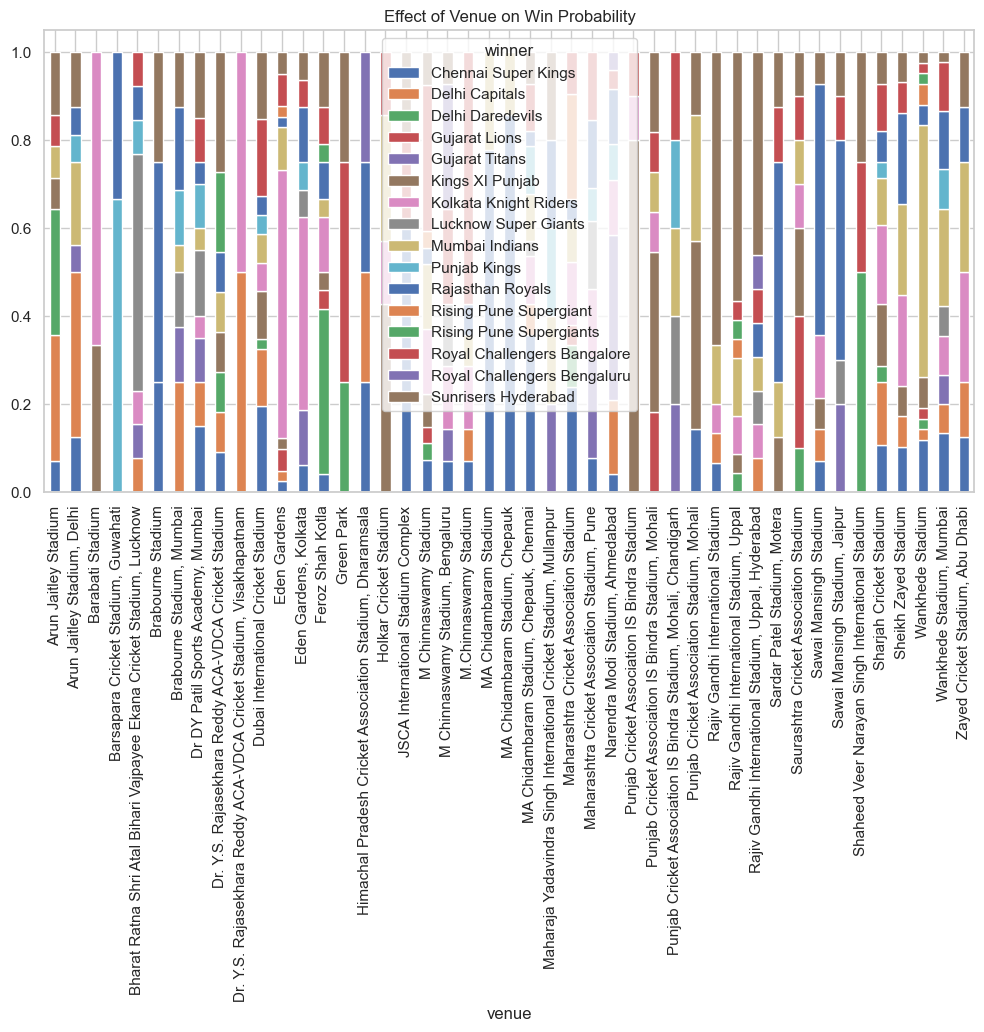

In [89]:
# 23. Effect of Venue on Win Probability
plt.figure(figsize=(12, 6))
df.groupby('venue')['winner'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Effect of Venue on Win Probability")
save_plot("venue_win_probability.jpg")
plt.show()

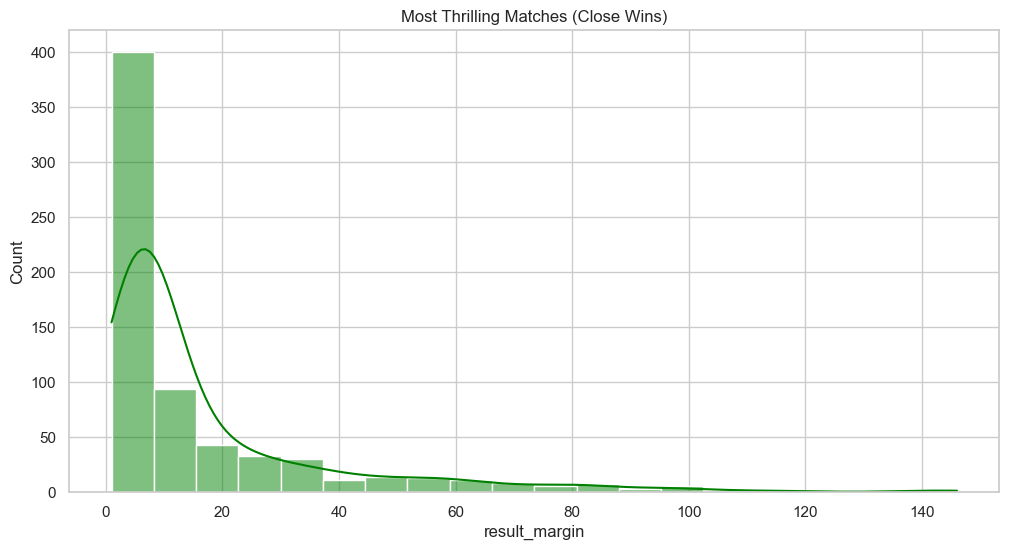

In [91]:
# 24. Most Thrilling Matches (Close Wins)
plt.figure(figsize=(12, 6))
sns.histplot(df['result_margin'].dropna(), bins=20, kde=True, color='green')
plt.title("Most Thrilling Matches (Close Wins)")
save_plot("close_win_matches.jpg")
plt.show()